First, create the model. This must match the model used in the interactive training notebook.

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F


Next, load the saved model.  Enter the model path you used to save.

In [4]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 60, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(60, 30, 5)
        self.fc1 = nn.Linear(30 * 5 * 5, 500)
        self.fc2 = nn.Linear(500, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 30 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


Convert and optimize the model using ``torch2trt`` for faster inference with TensorRT.  Please see the [torch2trt](https://github.com/NVIDIA-AI-IOT/torch2trt) readme for more details.

> This optimization process can take a couple minutes to complete. 

In [5]:
num_classes = 5  # hoặc 3, 4... tùy theo bạn đã train với bao nhiêu nhãn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = Net(num_classes)
model.load_state_dict(torch.load('sign_model.pt', map_location=device))
model = model.to(device).eval()

print("✅ Đã load mô hình CNN thành công.")


✅ Đã load mô hình CNN thành công.


Save the optimized model using the cell below

In [1]:
import cv2
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt

CATEGORIES = ['5km','15km','30km','40km','50km']    # sửa đúng tên theo dataset của bạn

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

def predict_image(img_path):
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    input_tensor = transform(img_rgb).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        pred = torch.argmax(output, 1).item()

    plt.imshow(img_rgb)
    plt.title(f"Dự đoán: {CATEGORIES[pred]}")
    plt.axis('off')
    plt.show()


In [2]:
import os

img_path = "TEST/0/000_0011.png"
print("🧾 Tồn tại:", os.path.exists(img_path))


🧾 Tồn tại: False


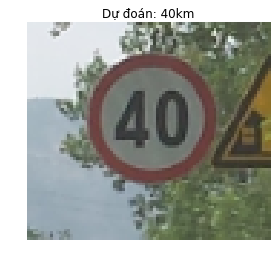

In [15]:
predict_image("TEST/3/003_1_0001.png")  # thay bằng đường dẫn ảnh thực tế của bạn


In [ ]:
import torch
torch.cuda.empty_cache()
torch.cuda.ipc_collect()
